# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [29]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [30]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [41]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
years = np.array(list(set(df['Year'])))
column_header = df.columns.tolist() # it will make easier to select column for data representation eg 0 for Year
yearly_data = df.groupby('Year') #Data grouped together on the basis of year

def individual_year(year):
    return yearly_data.get_group(year)

aggregated_data = df.groupby('Year').agg('mean')

# # Create a continuous year range (1900-2023) and reindex the data
# year_range = pd.date_range(start='1900', end='2024', freq='YE')
# aggregated_data = aggregated_data.reindex(year_range.year)
aggregated_data


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


In [47]:
# Resetting years as an index and setting as an normal columns
aggregated_data = aggregated_data.reset_index()
aggregated_data

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

In [32]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here



CO2 Concentration (ppm)


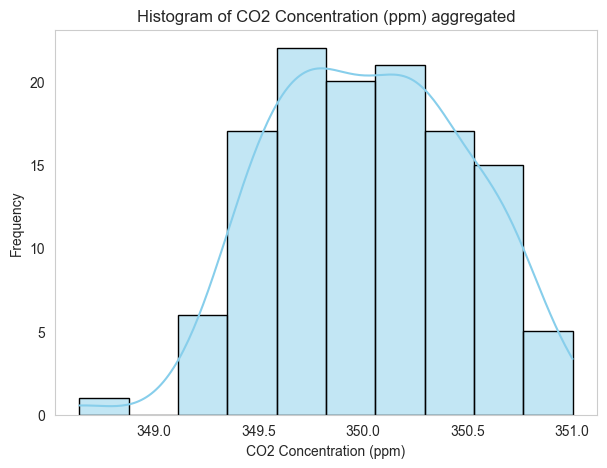

In [49]:
# Univariate Analysis for CO2 Concentration (ppm)
var = aggregated_data.columns[2]
print(var)
# Histogram using SNS histplot
plt.figure(figsize=(7,5))
sns.histplot(data=aggregated_data,x=var, kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title(f"Histogram of {var} aggregated")
plt.xlabel(var)
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

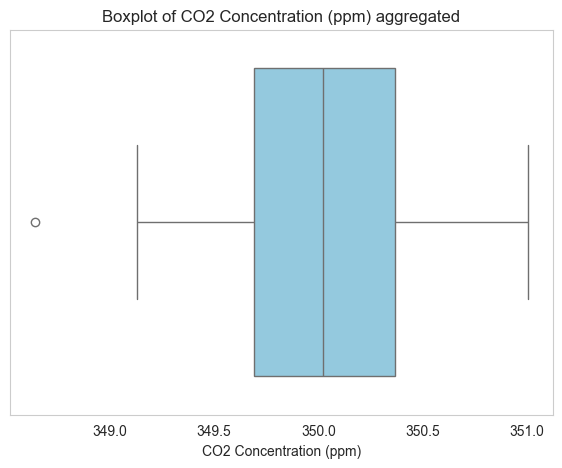

In [50]:
# Box plot using boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x = aggregated_data[var], color = 'skyblue' , vert = False)
plt.title(f"Boxplot of {var} aggregated")
plt.xlabel(var)
plt.grid(False)
plt.show()

Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')


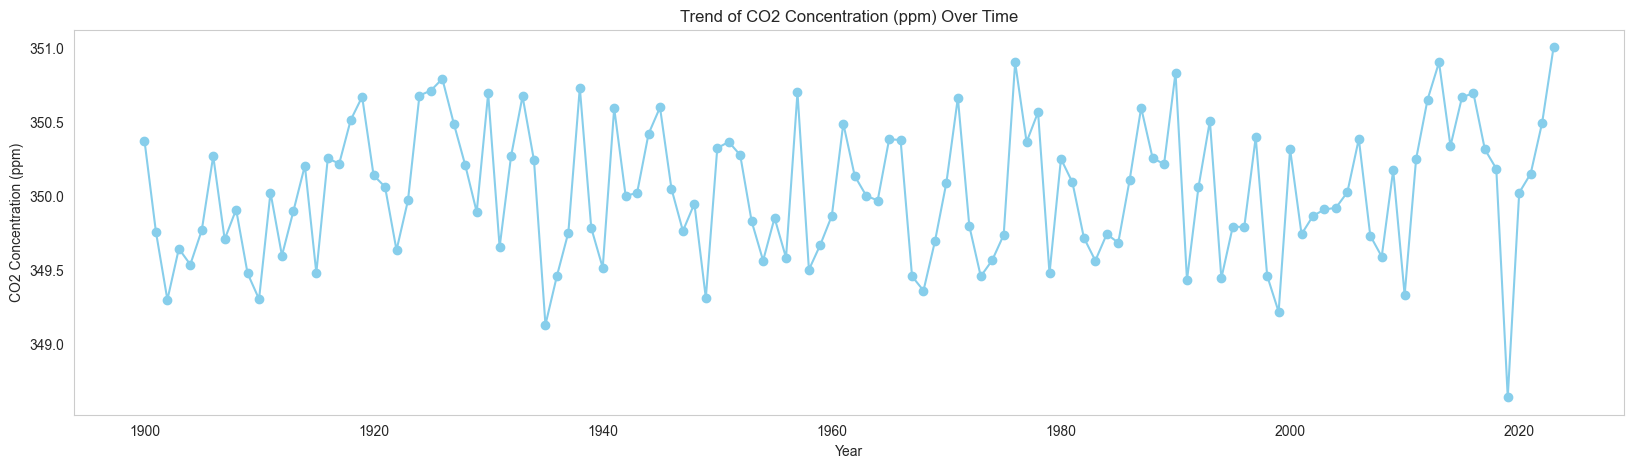

In [51]:
# line plots
print(aggregated_data.columns)

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var], color='skyblue', marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

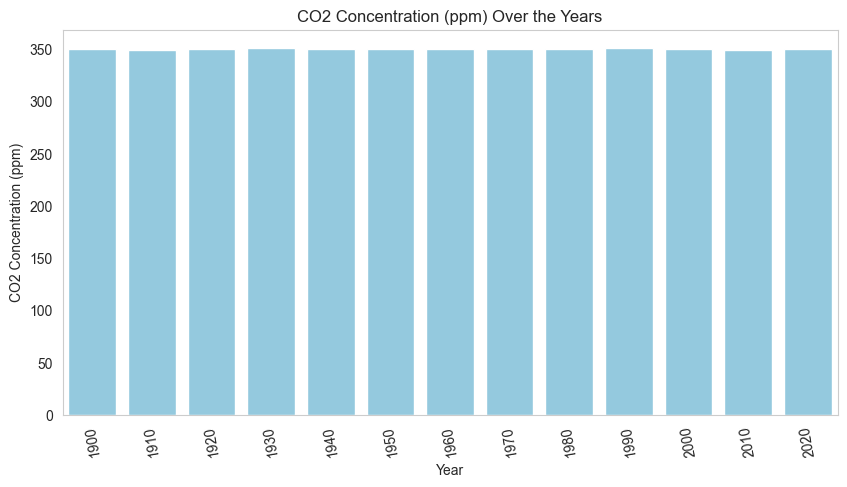

In [52]:
# Barchart
filtered_data = aggregated_data[aggregated_data['Year'] % 10 == 0]
plt.figure(figsize=(10, 5))
sns.barplot(x=filtered_data['Year'], y=filtered_data[var], color='skyblue')

# Add labels and title
plt.title(f'{var} Over the Years')
plt.xlabel('Year')
plt.ylabel(var)

# Show plot
plt.xticks(rotation=100)  # Rotate x-axis labels for better visibility
plt.grid(False)
plt.show()

<Figure size 700x500 with 0 Axes>

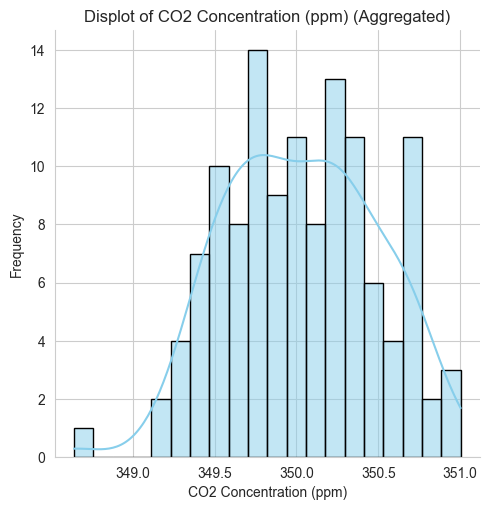

In [53]:
# Displot (Using displot, can combine histogram and KDE)
plt.figure(figsize=(7, 5))
sns.displot(aggregated_data[var], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Displot of {var} (Aggregated)')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()

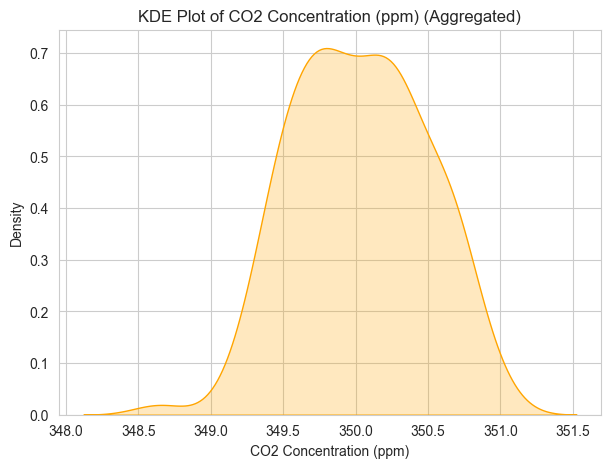

In [54]:
# KDE plot for CO2 concentration ppm
plt.figure(figsize=(7,5))
sns.kdeplot(aggregated_data[var], fill=True, color='orange')
plt.title(f'KDE Plot of {var} (Aggregated)')
plt.xlabel(var)
plt.ylabel('Density')
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')
Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')


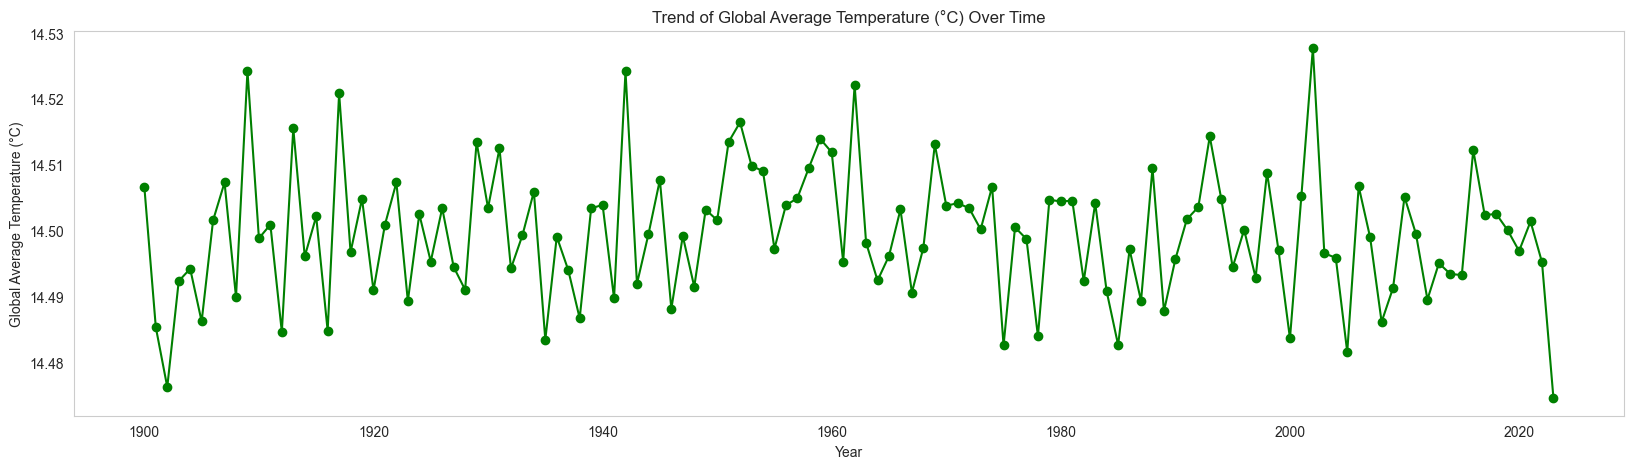

In [ ]:
# Line Plot (Trend over time / year bivariate analysis )

# print(aggregated_data.columns)

var = aggregated_data.columns[1]

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var], color='green', marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

In [ ]:
# Scatter Plot Bivariate Analysis (Sea Level Vs Temperatures)


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here